**SPARK IN FABRIC**

https://www.youtube.com/watch?v=02lSlhwLU4c

**JOINING DATAFRAMES**

https://github.com/LearnMicrosoftFabric/YouTube/blob/main/learn_spark_in_fabric/Day%2011%20-%20Joining%20and%20merging%20DataFrames.ipynb

In [1]:
sales_fact_df = spark.sql("SELECT * FROM lh_SparkInFabric.propertysales")
sales_fact_df.show()

StatementMeta(, 546f035c-0ea7-4305-973c-d4fca060aec3, 3, Finished, Available)

+-------------------+-----------------+-----------+-------------+--------------+
|            Address|            Agent|       City|SalePrice_USD|          Type|
+-------------------+-----------------+-----------+-------------+--------------+
|   1 Rowley Street |Penelope Pullman |   New York|       745000|Detached House|
|13a lollipop avenue|      Jack Smith |Los Angeles|       345000|     Apartment|
|       34 the drive|     Sheila Sammi|    Atlanta|       459000|         House|
+-------------------+-----------------+-----------+-------------+--------------+



Dimension Table

In [2]:
cities_data = [(1,"New York","USA"), \
    (2,"Los Angeles","USA"), \
    (3,"London","UK"), \
    (4,"Atlanta","USA"), \
    (5,"Dublin","Ireland")
  ]
cites_columns = ["city_uid","city_name","country"]

city_dimension_df = spark.createDataFrame(data=cities_data, schema = cites_columns)
city_dimension_df.show()

StatementMeta(, 546f035c-0ea7-4305-973c-d4fca060aec3, 4, Finished, Available)

+--------+-----------+-------+
|city_uid|  city_name|country|
+--------+-----------+-------+
|       1|   New York|    USA|
|       2|Los Angeles|    USA|
|       3|     London|     UK|
|       4|    Atlanta|    USA|
|       5|     Dublin|Ireland|
+--------+-----------+-------+



**Join the Sales fact table and the city dimension table**

https://spark.apache.org/docs/3.1.2/api/python/reference/api/pyspark.sql.DataFrame.join.html


Generic structure of a join statement:

first_df.join(second_df, first_df.ColumnNameOnWhichToJoin == second_df.ColumnNameOnWhichToJoin, join_type)

Join types available: default inner. Must be one of: inner, cross, outer, full, fullouter, full_outer, left, leftouter, left_outer, right, rightouter, right_outer, semi, leftsemi, left_semi, anti, leftanti and left_anti.

In [3]:

# inner join 
sales_fact_df.join(city_dimension_df,sales_fact_df.City == city_dimension_df.city_name, "inner") \
    .show()

StatementMeta(, 546f035c-0ea7-4305-973c-d4fca060aec3, 5, Finished, Available)

+-------------------+-----------------+-----------+-------------+--------------+--------+-----------+-------+
|            Address|            Agent|       City|SalePrice_USD|          Type|city_uid|  city_name|country|
+-------------------+-----------------+-----------+-------------+--------------+--------+-----------+-------+
|   1 Rowley Street |Penelope Pullman |   New York|       745000|Detached House|       1|   New York|    USA|
|13a lollipop avenue|      Jack Smith |Los Angeles|       345000|     Apartment|       2|Los Angeles|    USA|
|       34 the drive|     Sheila Sammi|    Atlanta|       459000|         House|       4|    Atlanta|    USA|
+-------------------+-----------------+-----------+-------------+--------------+--------+-----------+-------+



In [4]:

# same, but removing some of the columns we don't want  
sales_fact_df.join(city_dimension_df,sales_fact_df.City == city_dimension_df.city_name, "inner") \
    .drop(*('city_uid', 'city_name'))\
    .show()

StatementMeta(, 546f035c-0ea7-4305-973c-d4fca060aec3, 6, Finished, Available)

+-------------------+-----------------+-----------+-------------+--------------+-------+
|            Address|            Agent|       City|SalePrice_USD|          Type|country|
+-------------------+-----------------+-----------+-------------+--------------+-------+
|   1 Rowley Street |Penelope Pullman |   New York|       745000|Detached House|    USA|
|13a lollipop avenue|      Jack Smith |Los Angeles|       345000|     Apartment|    USA|
|       34 the drive|     Sheila Sammi|    Atlanta|       459000|         House|    USA|
+-------------------+-----------------+-----------+-------------+--------------+-------+



inner:
cross:
outer:
full:
fullouter:
full_outer:
left:
leftouter:
left_outer:
right:
rightouter:
right_outer:
semi:
leftsemi:
left_semi:
anti:
leftanti:
left_anti:

**Time Sseriess**

https://github.com/LearnMicrosoftFabric/YouTube/blob/main/learn_spark_in_fabric/Day%2012%20-%20Time-series.ipynb

In [5]:
data=[["1","2023-02-01"],["2","2023-03-01"],["3","2023-06-01"]]
df=spark.createDataFrame(data,["id","input"])
df.show()

StatementMeta(, 546f035c-0ea7-4305-973c-d4fca060aec3, 7, Finished, Available)

+---+----------+
| id|     input|
+---+----------+
|  1|2023-02-01|
|  2|2023-03-01|
|  3|2023-06-01|
+---+----------+



Formatting

In [7]:
from pyspark.sql.functions import col, date_format

df = df.select(col("input"), date_format(col("input"), "MM-dd-yyyy").alias("date_format"))
df.printSchema()

df.show()

StatementMeta(, 546f035c-0ea7-4305-973c-d4fca060aec3, 9, Finished, Available)

root
 |-- input: string (nullable = true)
 |-- date_format: string (nullable = true)

+----------+-----------+
|     input|date_format|
+----------+-----------+
|2023-02-01| 02-01-2023|
|2023-03-01| 03-01-2023|
|2023-06-01| 06-01-2023|
+----------+-----------+



String to date conversion

In [8]:
from pyspark.sql.functions import to_date

df = df.select(col("input"), 
    to_date(col("input"), "yyy-MM-dd").alias("to_date") 
  )
df.show()

StatementMeta(, 546f035c-0ea7-4305-973c-d4fca060aec3, 10, Finished, Available)

+----------+----------+
|     input|   to_date|
+----------+----------+
|2023-02-01|2023-02-01|
|2023-03-01|2023-03-01|
|2023-06-01|2023-06-01|
+----------+----------+



Date Difference

In [9]:
from pyspark.sql.functions import datediff, current_date

df.select(col("input"), 
    datediff(current_date(),col("input")).alias("datediff")  
  ).show()

StatementMeta(, 546f035c-0ea7-4305-973c-d4fca060aec3, 11, Finished, Available)

+----------+--------+
|     input|datediff|
+----------+--------+
|2023-02-01|     451|
|2023-03-01|     423|
|2023-06-01|     331|
+----------+--------+



Getting year,month, dayofmonth etc from a date

In [10]:
from pyspark.sql.functions import dayofweek, dayofmonth, dayofyear, month, year

df.select(col("input"),  
     year(col("input")).alias("year"), 
     month(col("input")).alias("month"), 
     dayofmonth(col("input")).alias("day"), 
     dayofweek(col("input")).alias("dayofweek"), 
     dayofmonth(col("input")).alias("dayofmonth"), 
     dayofyear(col("input")).alias("dayofyear"), 
  ).show()

StatementMeta(, 546f035c-0ea7-4305-973c-d4fca060aec3, 12, Finished, Available)

+----------+----+-----+---+---------+----------+---------+
|     input|year|month|day|dayofweek|dayofmonth|dayofyear|
+----------+----+-----+---+---------+----------+---------+
|2023-02-01|2023|    2|  1|        4|         1|       32|
|2023-03-01|2023|    3|  1|        4|         1|       60|
|2023-06-01|2023|    6|  1|        5|         1|      152|
+----------+----+-----+---+---------+----------+---------+



**SPARK SQL**

https://github.com/LearnMicrosoftFabric/YouTube/blob/main/learn_spark_in_fabric/Day%2013%20-%20Spark%20SQL.ipynb

In [11]:
df = spark.sql("SELECT * FROM lh_SparkInFabric.propertysales LIMIT 1000")
display(df)

StatementMeta(, 546f035c-0ea7-4305-973c-d4fca060aec3, 13, Finished, Available)

SynapseWidget(Synapse.DataFrame, a778578a-a086-4fbb-89f2-137a1c1eb038)

Traditional SQL

In [18]:
df = spark.sql("SELECT concat(Address,', ', City ) as FullAddress, Type FROM lh_SparkInFabric.propertysales WHERE Type like '%House%' ")
display(df)

StatementMeta(, 546f035c-0ea7-4305-973c-d4fca060aec3, 20, Finished, Available)

SynapseWidget(Synapse.DataFrame, be69196e-aedc-49b6-af6d-ec25fd8ff228)

Dynamic SQL Statements

We can make use of f-strings in Python to dynamically inject python variables into the SQL query string - fun!

You might use this to loop through a list of table names, read them into a dataframe one-by-one and and perform some actions on them.

In [14]:

# define a list for looping
limits = [1,2,3]

# loop through the list, injecting the dynamic variable into the SQL query string 
for limit in limits: 
    df = spark.sql(f"SELECT * FROM lh_SparkInFabric.propertysales LIMIT {limit}")
    #...
    df.show() 

StatementMeta(, 546f035c-0ea7-4305-973c-d4fca060aec3, 16, Finished, Available)

+----------------+-----------------+--------+-------------+--------------+
|         Address|            Agent|    City|SalePrice_USD|          Type|
+----------------+-----------------+--------+-------------+--------------+
|1 Rowley Street |Penelope Pullman |New York|       745000|Detached House|
+----------------+-----------------+--------+-------------+--------------+

+-------------------+-----------------+-----------+-------------+--------------+
|            Address|            Agent|       City|SalePrice_USD|          Type|
+-------------------+-----------------+-----------+-------------+--------------+
|   1 Rowley Street |Penelope Pullman |   New York|       745000|Detached House|
|13a lollipop avenue|      Jack Smith |Los Angeles|       345000|     Apartment|
+-------------------+-----------------+-----------+-------------+--------------+

+-------------------+-----------------+-----------+-------------+--------------+
|            Address|            Agent|       City|SaleP

Temporary View

In [17]:

# first let's rfresh the datafame 
df = spark.sql("SELECT * FROM lh_SparkInFabric.propertysales")

# create a temporary view called 'SalesFact'
df.createOrReplaceTempView("SalesFact")

StatementMeta(, 546f035c-0ea7-4305-973c-d4fca060aec3, 19, Finished, Available)

In [16]:
# we can now reference that Temporary View within a spark.sql statement 
spark.sql("SELECT * from SalesFact").show()

StatementMeta(, 546f035c-0ea7-4305-973c-d4fca060aec3, 18, Finished, Available)

+-------------------+-----------------+-----------+-------------+--------------+
|            Address|            Agent|       City|SalePrice_USD|          Type|
+-------------------+-----------------+-----------+-------------+--------------+
|   1 Rowley Street |Penelope Pullman |   New York|       745000|Detached House|
|13a lollipop avenue|      Jack Smith |Los Angeles|       345000|     Apartment|
|       34 the drive|     Sheila Sammi|    Atlanta|       459000|         House|
+-------------------+-----------------+-----------+-------------+--------------+



**SPARKML EndtoEnd ML Project**

https://github.com/LearnMicrosoftFabric/YouTube/blob/main/learn_spark_in_fabric/Day%2014%2C%2015%2C%2016%20-%20SparkML%20Machine%20Learning%20Project.ipynb

https://spark.apache.org/docs/latest/ml-guide.html

It contains 7918 tweets mostly about mobile phones/ brands, with labels on their sentiment.

A Label of 0 means the text is positive/ neutral.

A label of 1 means the tweet contains negative sentiment.

Our goal is to build a simple machine learning training pipeline to correctly predict the sentiment of a given tweet.

This notebook covers:

basic feature extraction and feature engineering for text data
building a Pipeline
training a Logistic Regression model
evaluating our model
visualizing the results

Reading in the data, train/ test split

https://www.kaggle.com/datasets/dineshpiyasamara/sentiment-analysis-dataset

In [1]:
tweet_schema = "id int, label double, tweet string"

tweets_df = spark.read.csv(header=True, schema=tweet_schema, path="Files/sentiment_analysis.csv")

display(tweets_df.head(3))

# train test split 
training_data, test_data = tweets_df.randomSplit([0.8, 0.2], seed=33)

print('Training Data: ', training_data.count())
print('Test data: ', test_data.count())

StatementMeta(, 1d152290-9370-4f0d-8645-0f459c311efb, 3, Finished, Available)

SynapseWidget(Synapse.DataFrame, 40eb37fe-a917-4542-a61b-65474d55d7ac)

Training Data:  6260
Test data:  1660


Machine Learning Pipeline Construction

https://spark.apache.org/docs/latest/ml-pipeline.html

In [4]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import Tokenizer, HashingTF, IDF
from pyspark.ml.classification import LogisticRegression

# from our tweet, create a list of works (tokens) 
tokenizer = Tokenizer(inputCol="tweet", outputCol="words")
token_data = tokenizer.transform(training_data)
display(token_data.head(5))

StatementMeta(, 1d152290-9370-4f0d-8645-0f459c311efb, 6, Finished, Available)

SynapseWidget(Synapse.DataFrame, 0fdd8b76-e5f0-45c3-9522-3a7edb4c029d)

In [6]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import Tokenizer, HashingTF, IDF
from pyspark.ml.classification import LogisticRegression

# from our tweet, create a list of works (tokens) 
tokenizer = Tokenizer(inputCol="tweet", outputCol="words")

# map the sequence of words to their term frequency  
hashing_term_frequency = HashingTF(inputCol="words", outputCol="rawFeatures", numFeatures=20)

# calculate the IDF for each TF mapping (i.e. how rare is that term in the whole dataset?)
inverse_doc_frequency = IDF(inputCol="rawFeatures", outputCol="features")

# Create a new logistic regression object for the model
log_regression_model = LogisticRegression(maxIter=10, regParam=0.3, labelCol = 'label')

# Construct pipeline, and fit to training data
lr_pipeline = Pipeline(stages=[tokenizer, hashing_term_frequency, inverse_doc_frequency, log_regression_model]).fit(training_data)

StatementMeta(, 1d152290-9370-4f0d-8645-0f459c311efb, 8, Finished, Available)

2024-04-27:13:00:34,642 WARNING  [tracking_store.py:153] log_inputs not supported


Model Evaluation

StatementMeta(, 1d152290-9370-4f0d-8645-0f459c311efb, 9, Finished, Available)

/opt/spark/python/lib/pyspark.zip/pyspark/sql/context.py:157: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.


Area under ROC = 0.7270763114683261


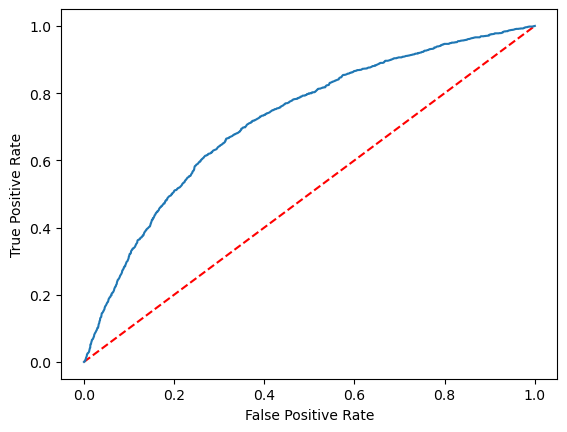

In [7]:

from pyspark.mllib.evaluation import BinaryClassificationMetrics

def test_and_viz(lr_pipeline): 

    # model evaluation
    predictions = lr_pipeline.transform(test_data)
    predictionAndLabels = predictions.select("label", "prediction").rdd
    metrics = BinaryClassificationMetrics(predictionAndLabels)
    print("Area under ROC = %s" % metrics.areaUnderROC)

    import matplotlib.pyplot as plt
    ## Plot the ROC curve; no need for pandas, because this uses the modelSummary object
    modelSummary = lr_pipeline.stages[-1].summary

    plt.plot([0, 1], [0, 1], 'r--')
    plt.plot(modelSummary.roc.select('FPR').collect(),
            modelSummary.roc.select('TPR').collect())
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

test_and_viz(lr_pipeline)

https://spark.apache.org/docs/latest/ml-tuning.html